## Lead Score - Case Study
Problem Statement
An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Goals and Objectives
There are quite a few goals for this case study.

1.Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

2.There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

# Exploratory Data Analysis 

In [1]:
# Importing required Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# warnings

import warnings
warnings.filterwarnings('ignore')

### Loading and Cleaning data
#### 1. Import file Leads

In [2]:
df=pd.read_csv("leads.csv")

In [3]:
df

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
df.shape

(9240, 37)

In [6]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### 2. Cleaning the data 

In [7]:
# Converting all the values to lower case
df = df.applymap(lambda s:s.lower() if type(s) == str else s)

In [8]:
# Replacing 'Select' with NaN (Since it means no option is selected)
df = df.replace('select',np.nan)

In [9]:
# Checking null values in each row
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [11]:
#dropping cols with more than 45% missing values

cols=df.columns

for i in cols:
    if((100*(df[i].isnull().sum()/len(df.index))) >= 45):
        df.drop(i, 1, inplace = True)

In [12]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [13]:
df.shape

(9240, 30)

In [14]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.0,...,no,no,no,interested in other courses,no,no,NaN,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.5,...,no,no,no,ringing,no,no,NaN,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,...,no,no,no,will revert after reading the email,no,no,mumbai,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,...,no,no,no,ringing,no,no,mumbai,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.0,1428,1.0,...,no,no,no,will revert after reading the email,no,no,mumbai,no,no,modified


There is a huge value of null variables in 6 columns as seen above. But removing the rows with the null value will cost us a lot of data and they are important columns. So, instead we are going to replace the NaN values with 'not provided'. This way we have all the data and almost no null values. In case these come up in the model, it will be of no use and we can drop it off then.

In [15]:
df['Specialization'] = df['Specialization'].fillna('not provided') 
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].fillna('not provided')
df['Country'] = df['Country'].fillna('not provided')
df['What is your current occupation'] = df['What is your current occupation'].fillna('not provided')
df['Tags'] = df['Tags'].fillna('not provided')
df['City'] = df['City'].fillna('not provided')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [16]:
# Rechecking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [17]:
df["Country"].value_counts()

india                   6492
not provided            2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
oman                       6
france                     6
unknown                    5
kuwait                     4
south africa               4
canada                     4
nigeria                    4
germany                    4
sweden                     3
philippines                2
uganda                     2
italy                      2
bangladesh                 2
netherlands                2
asia/pacific region        2
china                      2
belgium                    2
ghana                      2
kenya                      1
sri lanka                  1
tanzania                   1
malaysia                   1
liberia                    1
switzerland   

In [18]:
# we shall check for duplicates in the Prospect ID and Lead Number. if no duplicates exits we can drop the columns

#check for duplicates
sum(df.duplicated(subset = 'Prospect ID')) == 0

True

In [19]:
#check for duplicates
sum(df.duplicated(subset = 'Lead Number')) == 0

True

Clearly Prospect ID & Lead Number are two variables that are just indicative of the ID number of the Contacted People & can be dropped.

In [20]:
#dropping Lead Number and Prospect ID since they have all unique values

df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        9240 

In [22]:
#Checking the percent of lose if the null values are removed
round(100*(sum(df.isnull().sum(axis=1) > 1)/df.shape[0]),2)

1.48

In [23]:
df1 = df[df.isnull().sum(axis=1) <1]

In [24]:
# Code for checking number of rows left in percent
round(100*(df1.shape[0])/(df.shape[0]),2)

98.2

In [25]:
# Rechecking the percentage of missing values
round(100*(df1.isnull().sum()/len(df1.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [26]:
df.shape

(9240, 28)

## EDA- Univariate Analysis
#### 1. Categorical Variables Analysis

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        9240 

In [28]:
for column in df:
    print(df[column].astype('category').value_counts())
    print('--------------------------------------------------')

landing page submission    4886
api                        3580
lead add form               718
lead import                  55
quick add form                1
Name: Lead Origin, dtype: int64
--------------------------------------------------
google               2873
direct traffic       2543
olark chat           1755
organic search       1154
reference             534
welingak website      142
referral sites        125
facebook               55
bing                    6
click2call              4
live chat               2
press_release           2
social media            2
welearn                 1
welearnblog_home        1
pay per click ads       1
testone                 1
blog                    1
nc_edm                  1
youtubechannel          1
Name: Lead Source, dtype: int64
--------------------------------------------------
no     8506
yes     734
Name: Do Not Email, dtype: int64
--------------------------------------------------
no     9238
yes       2
Name: Do Not Call, dty

In [29]:
#checking value counts of Country column

df['Country'].value_counts(dropna=False)

india                   6492
not provided            2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
oman                       6
france                     6
unknown                    5
kuwait                     4
south africa               4
canada                     4
nigeria                    4
germany                    4
sweden                     3
philippines                2
uganda                     2
italy                      2
bangladesh                 2
netherlands                2
asia/pacific region        2
china                      2
belgium                    2
ghana                      2
kenya                      1
sri lanka                  1
tanzania                   1
malaysia                   1
liberia                    1
switzerland   

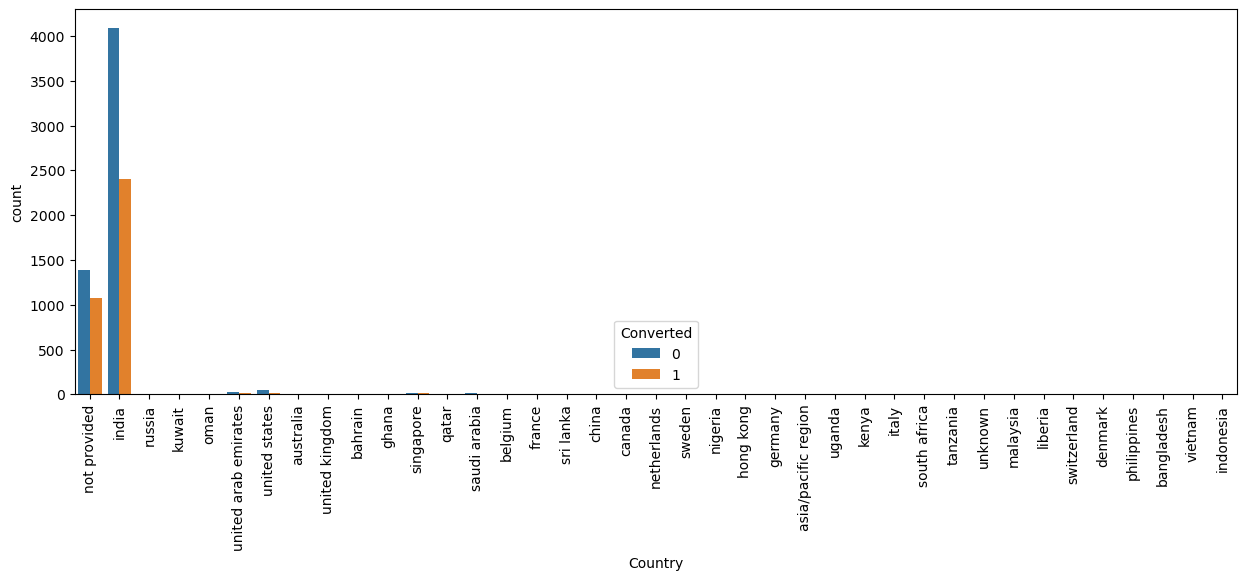

In [30]:
#plotting spread of Country columnn 
plt.figure(figsize=(15,5))
s1=sns.countplot(df.Country, hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

The number of Values of India in the entire data is quite high

In [31]:
#checking value counts of "City" column

df['City'].value_counts(dropna=False)

not provided                   3669
mumbai                         3222
thane & outskirts               752
other cities                    686
other cities of maharashtra     457
other metro cities              380
tier ii cities                   74
Name: City, dtype: int64

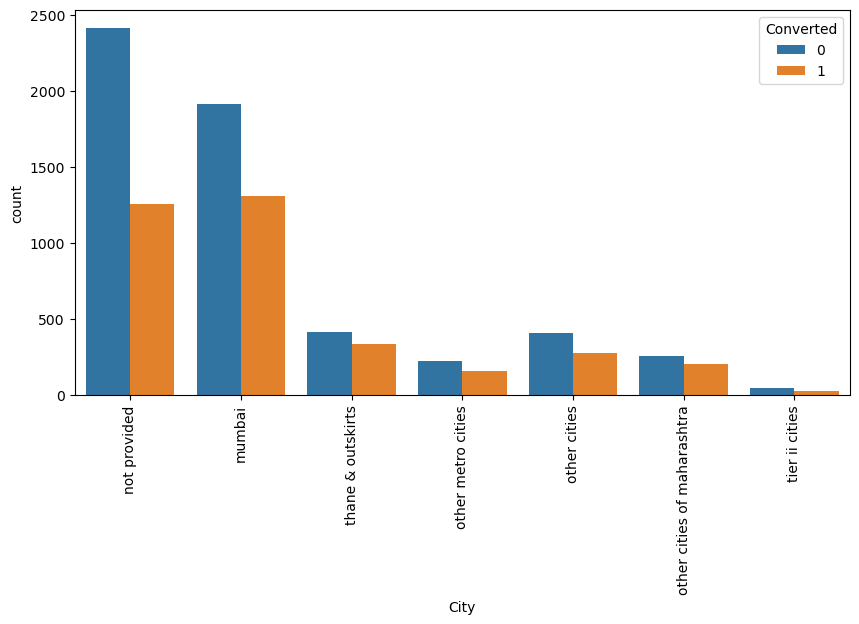

In [32]:
plt.figure(figsize=(10,5))
s1=sns.countplot(df.City, hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [33]:
#creating a list of columns to be droppped

df.drop(['City'], 1, inplace = True)

City is dropped as it does not effect the analysis

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        9240 

In [35]:
#checking value counts of Specialization column

df['Specialization'].value_counts(dropna=False)

not provided                         3380
finance management                    976
human resource management             848
marketing management                  838
operations management                 503
business administration               403
it projects management                366
supply chain management               349
banking, investment and insurance     338
travel and tourism                    203
media and advertising                 203
international business                178
healthcare management                 159
hospitality management                114
e-commerce                            112
retail management                     100
rural and agribusiness                 73
e-business                             57
services excellence                    40
Name: Specialization, dtype: int64

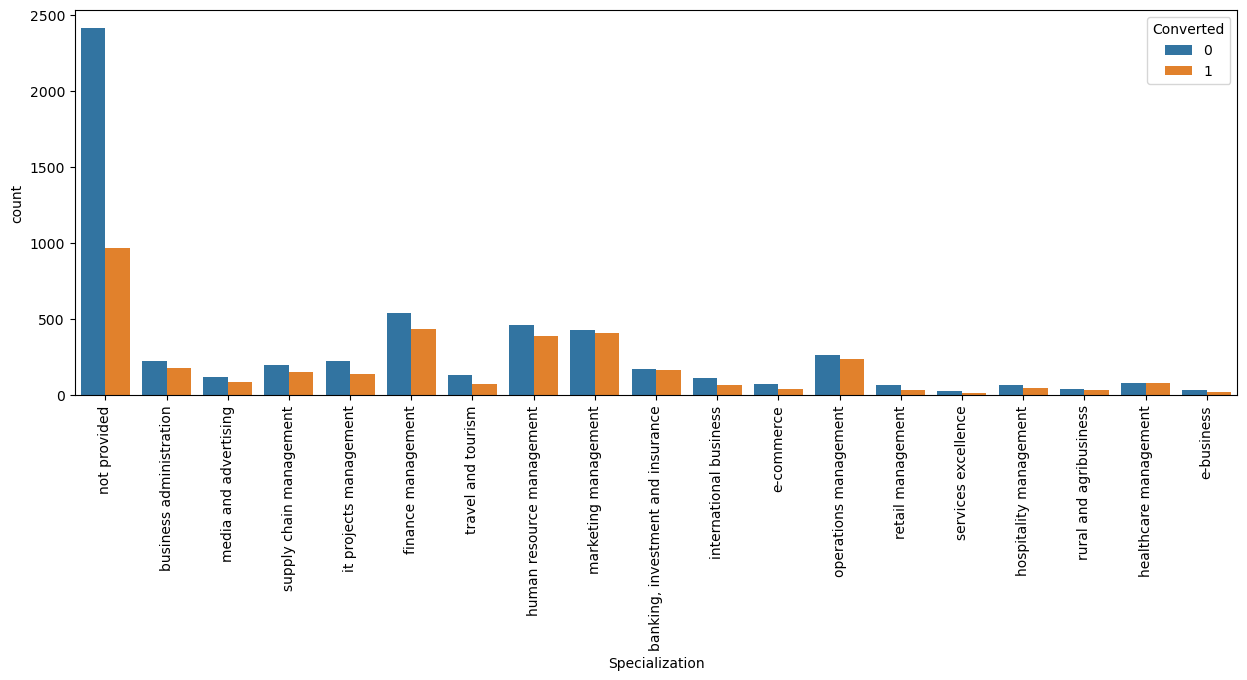

In [36]:
#plotting spread of Specialization columnn 

plt.figure(figsize=(15,5))
s1=sns.countplot(df.Specialization, hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

We see that specialization with Management in them have higher number of leads as well as leads converted. So this is definitely a significant variable and should not be dropped.

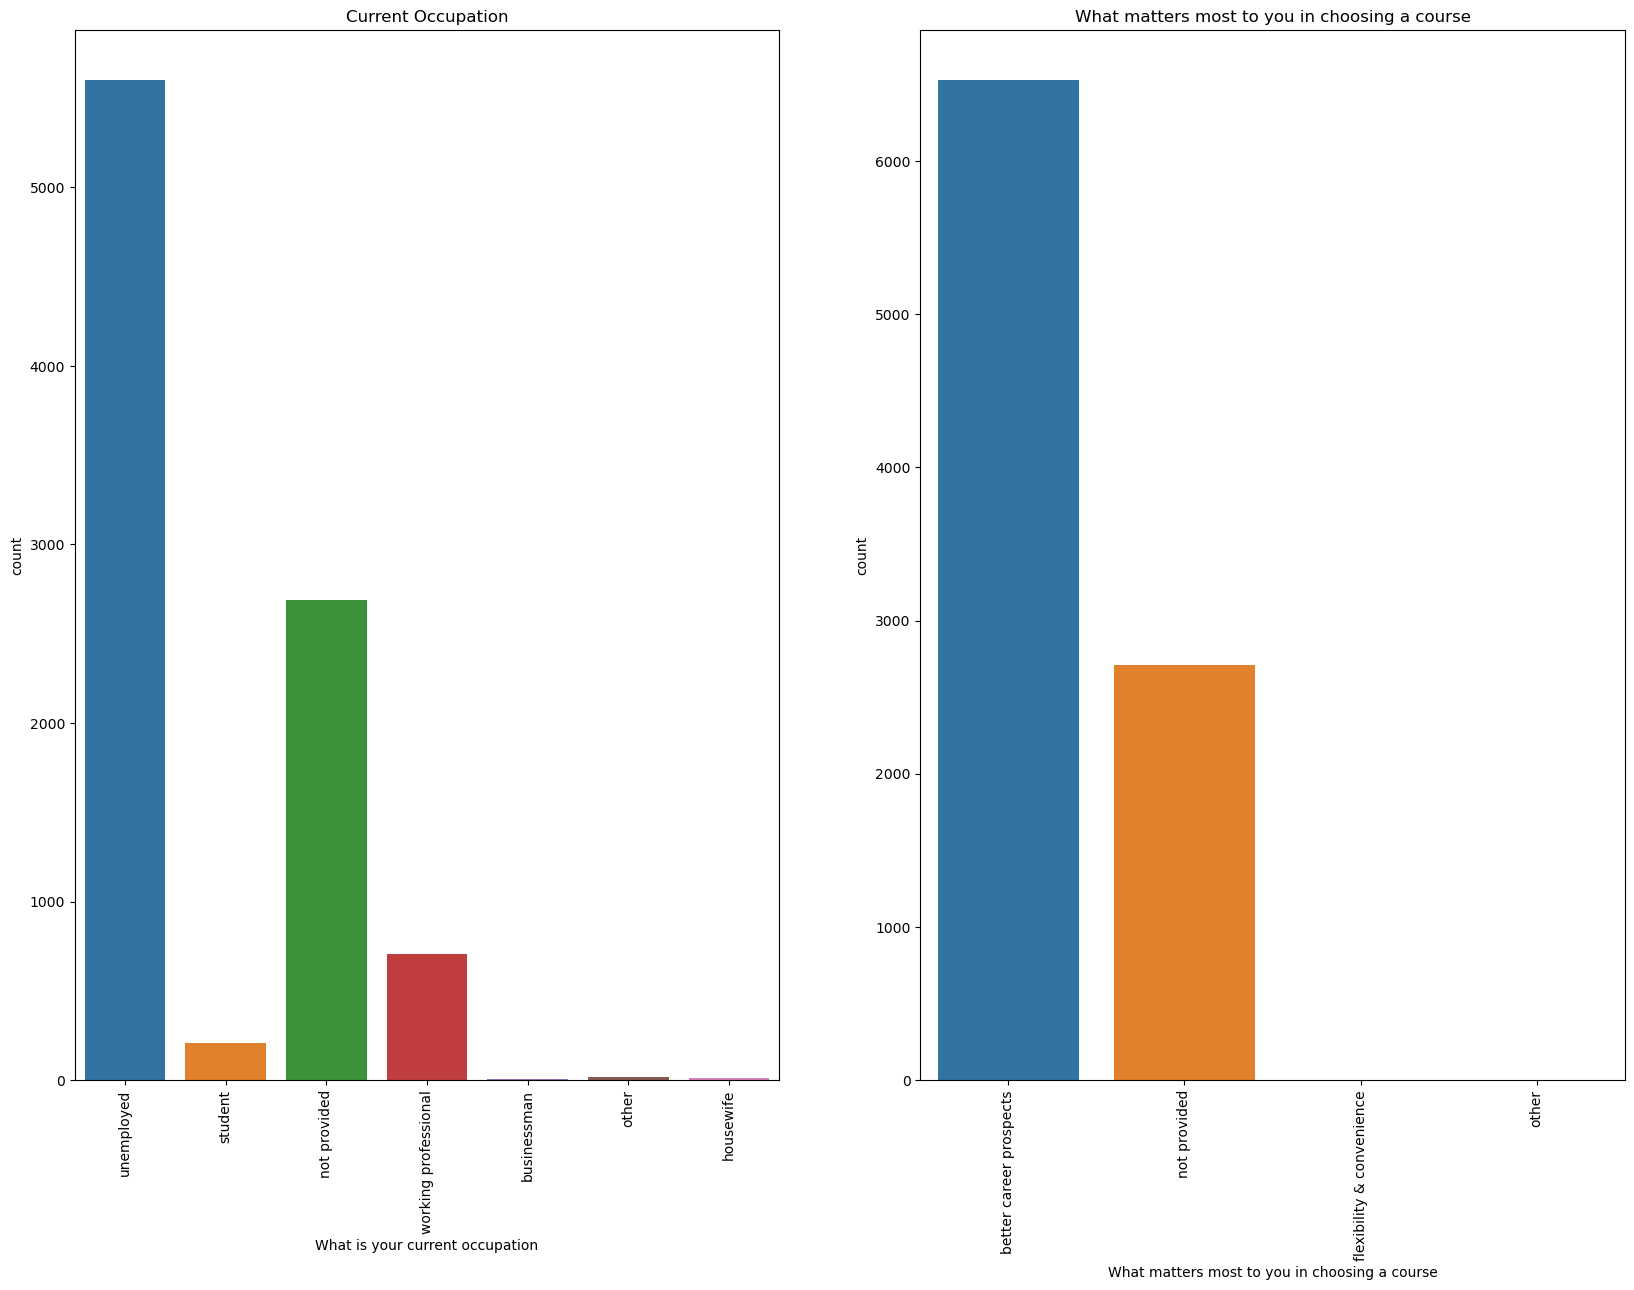

In [37]:
plt.figure(figsize = (20,30))
plt.subplot(2,2,1)
sns.countplot(df['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')
plt.subplot(2,2,2)
sns.countplot(df['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')
plt.show()

Working Professionals going for the course have high chances of joining it.

Unemployed leads are the most in terms of Absolute numbers.

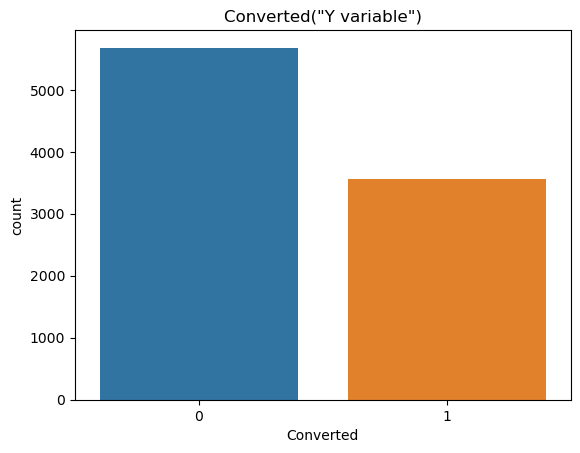

In [38]:
sns.countplot(df['Converted'])
plt.title('Converted("Y variable")')
plt.show()

In [39]:
#checking value counts of Tag variable
df['Tags'].value_counts(dropna=False)

not provided                                         3353
will revert after reading the email                  2072
ringing                                              1203
interested in other courses                           513
already a student                                     465
closed by horizzon                                    358
switched off                                          240
busy                                                  186
lost to eins                                          175
not doing further education                           145
interested  in full time mba                          117
graduation in progress                                111
invalid number                                         83
diploma holder (not eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [40]:
#replacing tags with low frequency with "Other Tags"
df['Tags'] = df['Tags'].replace(['in confusion whether part time or dlp', 'in touch with eins','diploma holder (not eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','still thinking',
                                    'lost to Others','shall take in the next coming month','lateral student','interested in next batch',
                                    'recognition issue (dec approval)','want to take admission but has financial problems',
                                    'university not recognized'], 'Other_Tags')


In [41]:
df['Tags'].value_counts(dropna=False)

not provided                           3353
will revert after reading the email    2072
ringing                                1203
interested in other courses             513
already a student                       465
closed by horizzon                      358
switched off                            240
busy                                    186
lost to eins                            175
Other_Tags                              165
not doing further education             145
interested  in full time mba            117
graduation in progress                  111
invalid number                           83
wrong number given                       47
lost to others                            7
Name: Tags, dtype: int64

In [42]:
df['Tags'] = df['Tags'].replace(['switched off',
                                      'already a student',
                                       'not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'interested  in full time mba'] , 'Other_Tags')

In [43]:
df['Tags'].value_counts(dropna=False)

not provided                           3353
will revert after reading the email    2072
Other_Tags                             1262
ringing                                1203
interested in other courses             513
closed by horizzon                      358
busy                                    186
lost to eins                            175
graduation in progress                  111
lost to others                            7
Name: Tags, dtype: int64

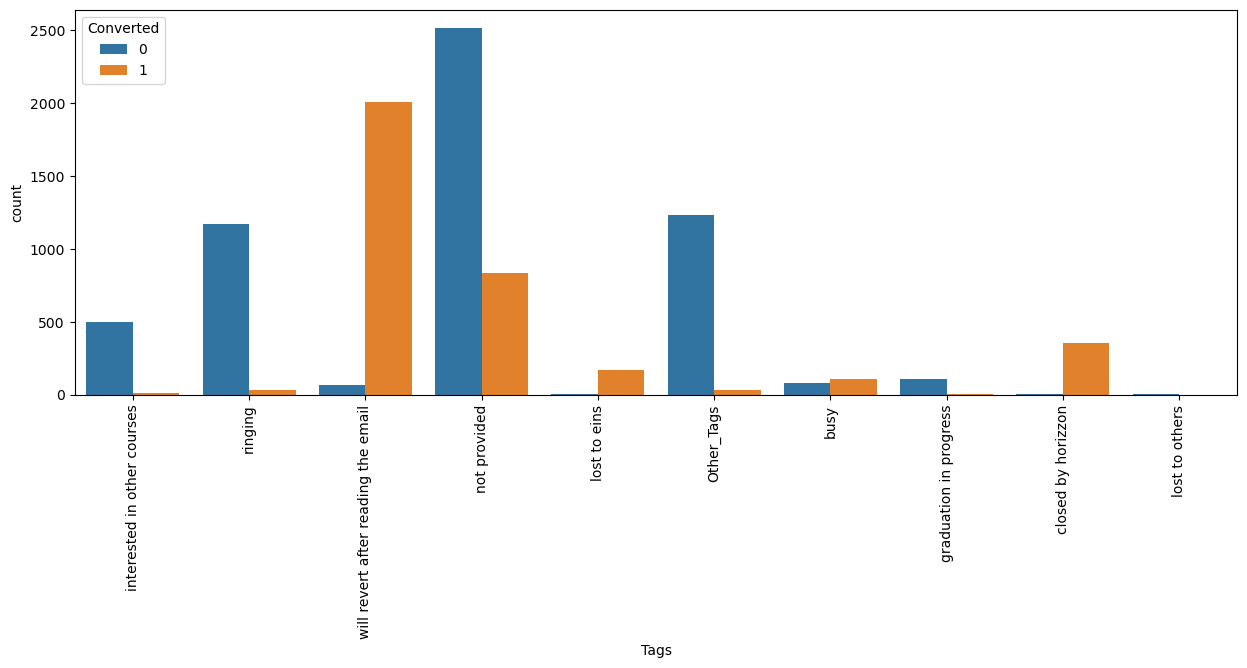

In [44]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))
s1=sns.countplot(df['Tags'], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [45]:
#checking value counts of Lead Source column

df['Lead Source'].value_counts(dropna=False)

google               2873
direct traffic       2543
olark chat           1755
organic search       1154
reference             534
welingak website      142
referral sites        125
facebook               55
NaN                    36
bing                    6
click2call              4
press_release           2
social media            2
live chat               2
youtubechannel          1
testone                 1
pay per click ads       1
welearnblog_home        1
welearn                 1
blog                    1
nc_edm                  1
Name: Lead Source, dtype: int64

In [46]:
#replacing Nan Values and combining low frequency values
df['Lead Source'] = df['Lead Source'].replace(np.nan,'Others')
df['Lead Source'] = df['Lead Source'].replace('google','Google')
df['Lead Source'] = df['Lead Source'].replace('facebook','Social Media')
df['Lead Source'] = df['Lead Source'].replace(['bing','click2call','press_release',
                                                     'youtubechannel','welearnblog_home',
                                                     'welearn','blog','pay per click ads',
                                                    'testone','nc_edm'] ,'Others')                                     

In [47]:
df['Lead Source'].value_counts(dropna=False)

Google              2873
direct traffic      2543
olark chat          1755
organic search      1154
reference            534
welingak website     142
referral sites       125
Social Media          55
Others                55
social media           2
live chat              2
Name: Lead Source, dtype: int64

We can group some of the lower frequency occuring labels under a common label 'Others'

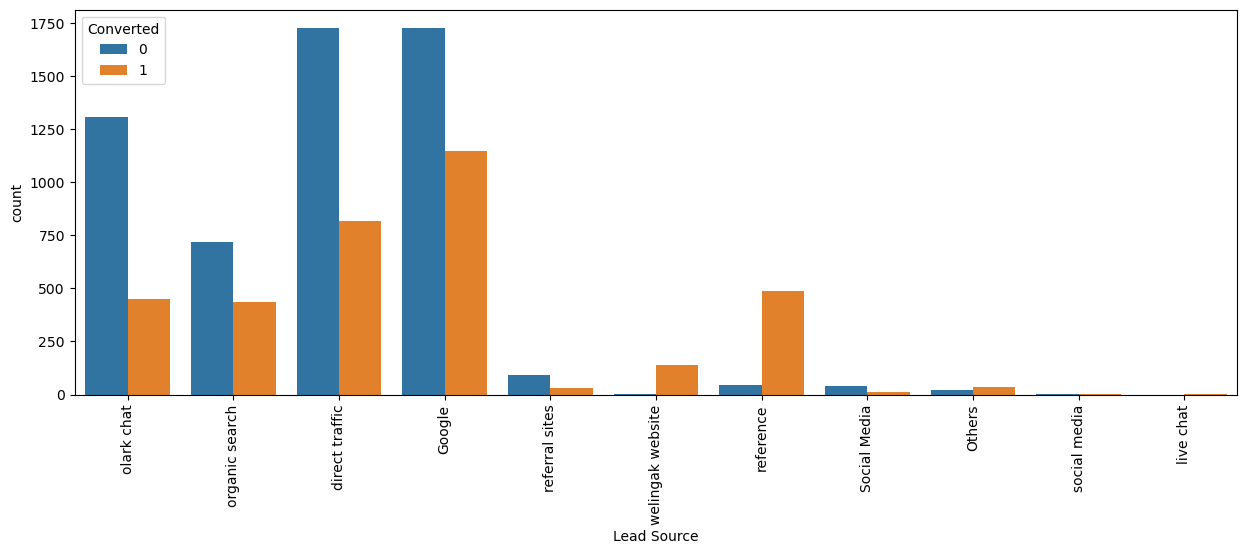

In [48]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(df['Lead Source'], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Inference:
Maximum number of leads are generated by Google and Direct traffic.

Conversion Rate of reference leads and leads through welingak website is high.

To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.


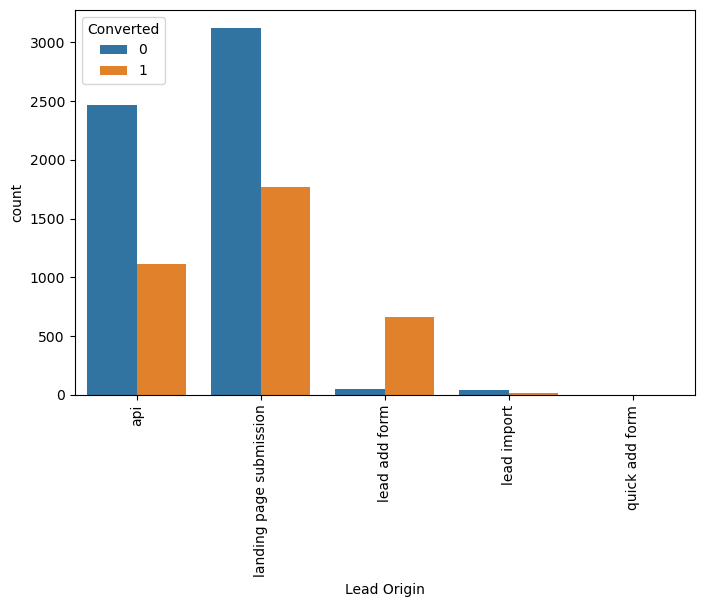

In [49]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(8,5))
s1=sns.countplot(df['Lead Origin'], hue=df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

### Inference
API and Landing Page Submission bring higher number of leads as well as conversion.

Lead Add Form has a very high conversion rate but count of leads are not very high.

Lead Import and Quick Add Form get very few leads.

In order to improve overall lead conversion rate, we have to improve lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

In [50]:
#Check the Null Values in All Columns:
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [51]:
# Last Activity:

df['Last Activity'].value_counts(dropna=False)

email opened                    3437
sms sent                        2745
olark chat conversation          973
page visited on website          640
converted to lead                428
email bounced                    326
email link clicked               267
form submitted on website        116
NaN                              103
unreachable                       93
unsubscribed                      61
had a phone conversation          30
approached upfront                 9
view in browser link clicked       6
email received                     2
email marked spam                  2
visited booth in tradeshow         1
resubscribed to emails             1
Name: Last Activity, dtype: int64

In [52]:
#replacing Nan Values and combining low frequency values

df['Last Activity'] = df['Last Activity'].replace(np.nan,'Others')
df['Last Activity'] = df['Last Activity'].replace(['unreachable','unsubscribed',
                                                        'had a phone conversation', 
                                                        'approached upfront',
                                                        'view in browser link clicked',       
                                                        'email marked spam',                  
                                                        'email received','resubscribed to emails',
                                                         'visited booth in tradeshow'],'Others')

In [53]:
df['Last Activity'].value_counts(dropna=False)

email opened                 3437
sms sent                     2745
olark chat conversation       973
page visited on website       640
converted to lead             428
email bounced                 326
Others                        308
email link clicked            267
form submitted on website     116
Name: Last Activity, dtype: int64

In [54]:
#Check the Null Values in All Columns:
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [55]:
#Drop all rows which have Nan Values. Since the number of Dropped rows is less than 2%, it will not affect the model
df = df.dropna()

In [56]:
#Checking percentage of Null Values in All Columns:
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

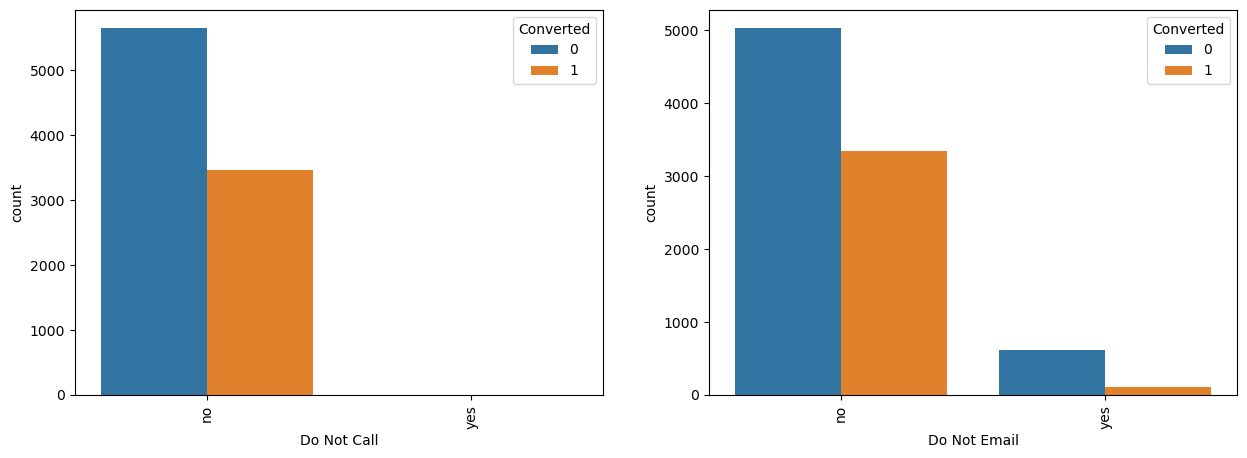

In [57]:
#Do Not Email & Do Not Call
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))

ax1=plt.subplot(1, 2, 1)
ax1=sns.countplot(df['Do Not Call'], hue=df.Converted)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

ax2=plt.subplot(1, 2, 2)
ax2=sns.countplot(df['Do Not Email'], hue=df.Converted)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

In [58]:
#checking value counts for Do Not Call
df['Do Not Call'].value_counts(dropna=False)

no     9101
yes       2
Name: Do Not Call, dtype: int64

In [59]:
#checking value counts for Do Not Email
df['Do Not Email'].value_counts(dropna=False)

no     8379
yes     724
Name: Do Not Email, dtype: int64

In [60]:
#checking value counts of last Notable Activity
df['Last Notable Activity'].value_counts()

modified                        3270
email opened                    2827
sms sent                        2172
page visited on website          318
olark chat conversation          183
email link clicked               173
email bounced                     60
unsubscribed                      47
unreachable                       32
had a phone conversation          14
email marked spam                  2
approached upfront                 1
resubscribed to emails             1
view in browser link clicked       1
form submitted on website          1
email received                     1
Name: Last Notable Activity, dtype: int64

In [61]:
#clubbing lower frequency values

df['Last Notable Activity'] = df['Last Notable Activity'].replace(['had a phone conversation',
                                                                       'email marked spam',
                                                                         'unreachable',
                                                                         'unsubscribed',
                                                                         'email bounced',                                                                    
                                                                       'resubscribed to emails',
                                                                       'view in browser link clicked',
                                                                       'approached upfront','form submitted on website', 
                                                                       'email received'],'Other_Notable_activity')

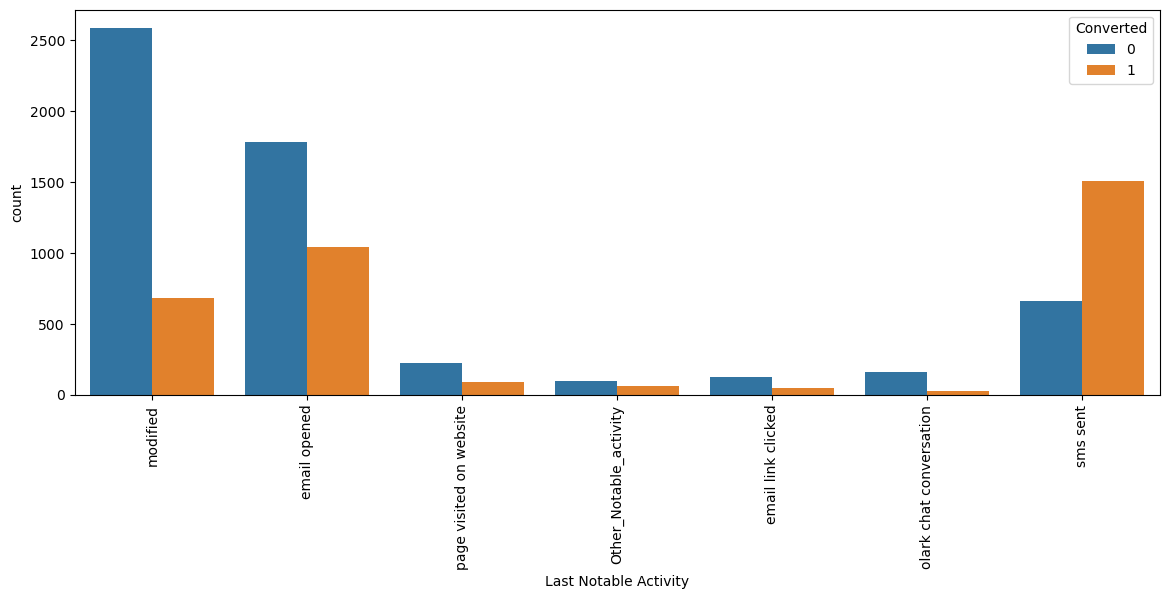

In [62]:
#visualizing count of Variable based on Converted value

plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = df)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

In [63]:
#checking value counts for variable

df['Last Notable Activity'].value_counts()

modified                   3270
email opened               2827
sms sent                   2172
page visited on website     318
olark chat conversation     183
email link clicked          173
Other_Notable_activity      160
Name: Last Notable Activity, dtype: int64

In [64]:
cols_to_drop=['Country','What matters most to you in choosing a course',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [65]:
df=df.drop(cols_to_drop,1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  Tags                                    9103 non-null   obje

#### 2.Numerical attributes Analysis

In [66]:
#Check the % of Data that has Converted Values = 1:

Converted = (sum(df['Converted'])/len(df['Converted'].index))*100
Converted

38.02043282434362

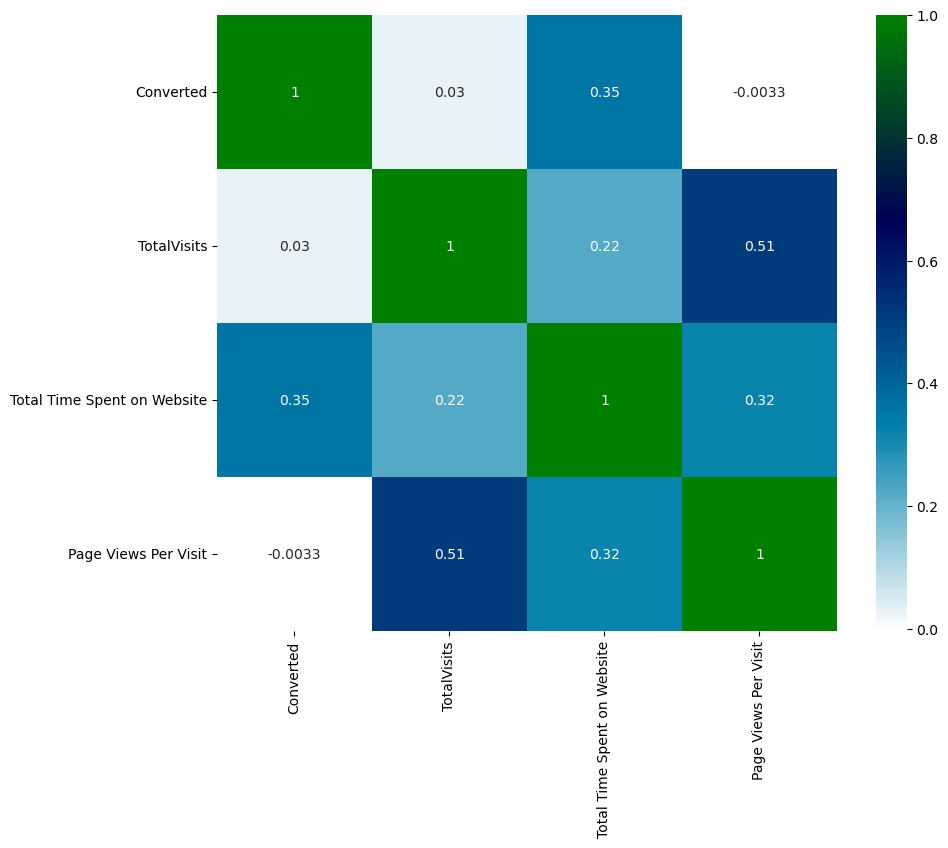

In [70]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(df.corr(), cmap="ocean_r", annot=True)
plt.show()

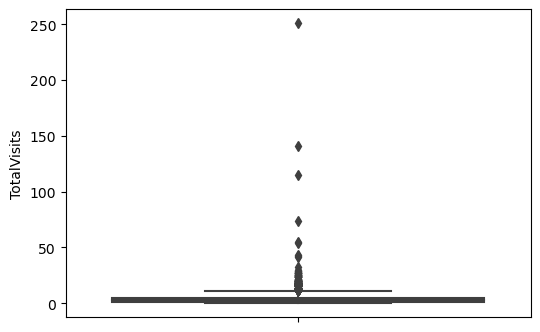

In [71]:
#Total Visits
#visualizing spread of variable

plt.figure(figsize=(6,4))
sns.boxplot(y=df['TotalVisits'])
plt.show()

There are ouliers present here.

In [72]:
#checking percentile values for "Total Visits"

df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

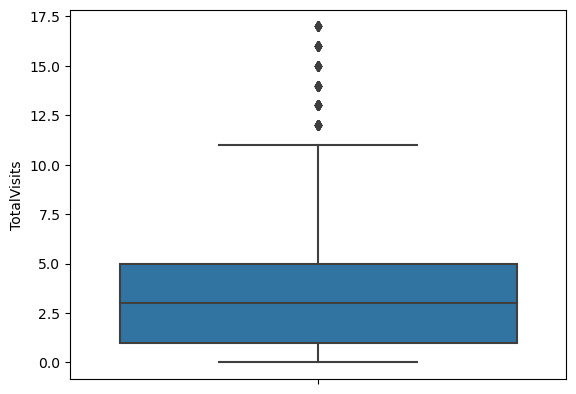

In [73]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = df.TotalVisits.quantile(0.99)
df = df[(df.TotalVisits <= Q3)]
Q1 = df.TotalVisits.quantile(0.01)
df = df[(df.TotalVisits >= Q1)]
sns.boxplot(y=df['TotalVisits'])
plt.show()

In [74]:
df.shape

(9020, 13)

In [75]:
#checking percentiles for "Total Time Spent on Website"

df['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9020.000000
mean      479.759534
std       544.688157
min         0.000000
5%          0.000000
25%         7.000000
50%       243.000000
75%       915.250000
90%      1371.000000
95%      1554.050000
99%      1836.620000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

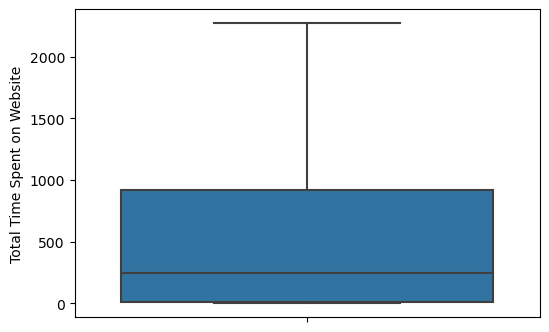

In [76]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=df['Total Time Spent on Website'])
plt.show()

There are no outliers here 

In [77]:
#checking spread of "Page Views Per Visit"

df['Page Views Per Visit'].describe()

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

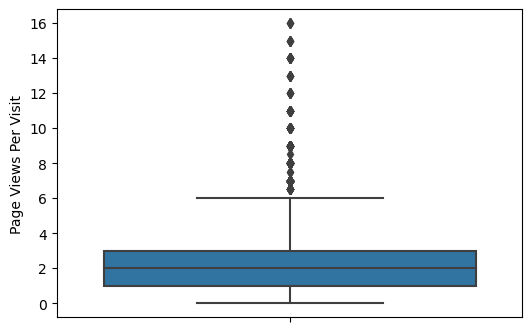

In [78]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=df['Page Views Per Visit'])
plt.show()

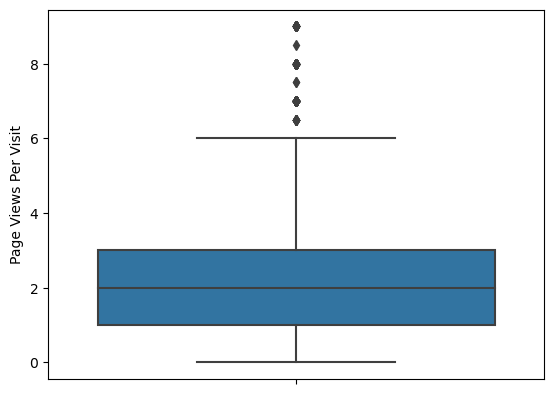

In [79]:
#Outlier Treatment: Remove top & bottom 1% 

Q3 = df['Page Views Per Visit'].quantile(0.99)
df = df[df['Page Views Per Visit'] <= Q3]
Q1 = df['Page Views Per Visit'].quantile(0.01)
df = df[df['Page Views Per Visit'] >= Q1]
sns.boxplot(y=df['Page Views Per Visit'])
plt.show()

In [80]:
df.shape

(8953, 13)

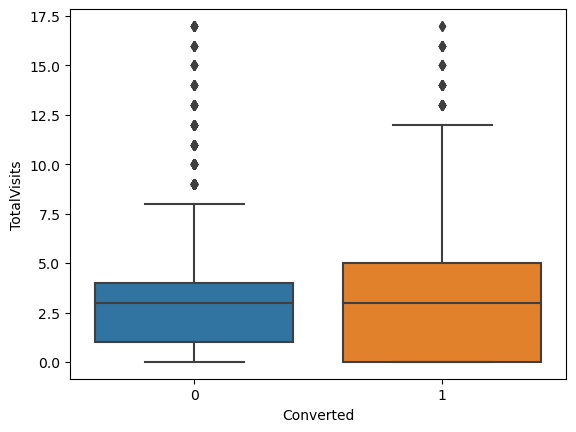

In [81]:
#checking Spread of "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df)
plt.show()

Inference

Median for converted and not converted leads are the close.

Nothng conclusive can be said on the basis of Total Visits

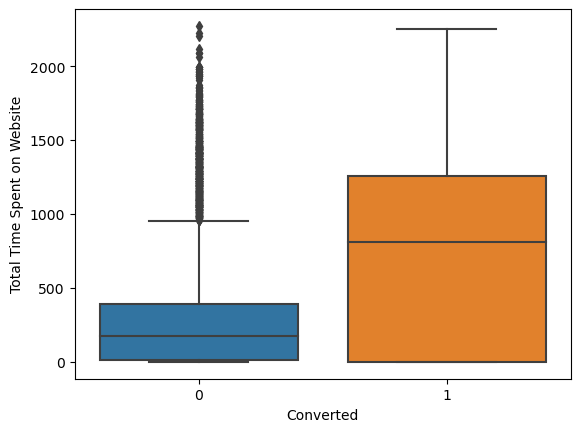

In [82]:
#checking Spread of "Total Time Spent on Website" vs Converted variable

sns.boxplot(x=df.Converted, y=df['Total Time Spent on Website'])
plt.show()

Inference

Leads spending more time on the website are more likely to be converted.

Website should be made more engaging to make leads spend more time.

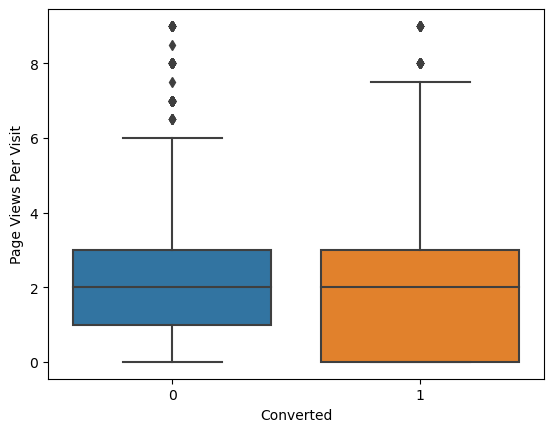

In [83]:
#checking Spread of "Page Views Per Visit" vs Converted variable

sns.boxplot(x=df.Converted,y=df['Page Views Per Visit'])
plt.show()

Inference

Median for converted and unconverted leads is the same.

Nothing can be said specifically for lead conversion from Page Views Per Visit

In [84]:
#checking missing values in leftover columns/

round(100*(df.isnull().sum()/len(df.index)),2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

There are no missing values in the columns to be analyzed further

### Dummy Variable Creation

In [85]:
#getting a list of categorical columns

cat_cols= df.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [86]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [87]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(df[['Lead Origin','What is your current occupation',
                             ]], drop_first=True)

df = pd.concat([df,dummy],1)

In [88]:
dummy = pd.get_dummies(df['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_not provided'], 1)
df = pd.concat([df, dummy], axis = 1)

In [89]:
dummy = pd.get_dummies(df['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
df = pd.concat([df, dummy], axis = 1)

In [90]:
dummy = pd.get_dummies(df['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
df = pd.concat([df, dummy], axis = 1)

In [91]:
dummy = pd.get_dummies(df['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], 1)
df = pd.concat([df, dummy], axis = 1)

In [92]:
dummy = pd.get_dummies(df['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_not provided'], 1)
df = pd.concat([df, dummy], axis = 1)

In [93]:
#dropping the original columns after dummy variable creation

df.drop(cat_cols,1,inplace = True)

In [94]:
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,What is your current occupation_housewife,What is your current occupation_not provided,What is your current occupation_other,...,Last Notable Activity_sms sent,Tags_Other_Tags,Tags_busy,Tags_closed by horizzon,Tags_graduation in progress,Tags_interested in other courses,Tags_lost to eins,Tags_lost to others,Tags_ringing,Tags_will revert after reading the email
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1



# Logistic Regression Model Building 

### Train-Test Split

In [95]:
from sklearn.model_selection import train_test_split

# Putting response variable to y
y = df['Converted']

y.head()

X=df.drop('Converted', axis=1)

In [96]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [97]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6267 entries, 9196 to 5825
Data columns (total 63 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6267 non-null   float64
 1   Total Time Spent on Website                           6267 non-null   int64  
 2   Page Views Per Visit                                  6267 non-null   float64
 3   Lead Origin_landing page submission                   6267 non-null   uint8  
 4   Lead Origin_lead add form                             6267 non-null   uint8  
 5   Lead Origin_lead import                               6267 non-null   uint8  
 6   What is your current occupation_housewife             6267 non-null   uint8  
 7   What is your current occupation_not provided          6267 non-null   uint8  
 8   What is your current occupation_other                 6

#### Scaling the Data 

In [98]:
#scaling numeric columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,What is your current occupation_housewife,What is your current occupation_not provided,What is your current occupation_other,What is your current occupation_student,...,Last Notable Activity_sms sent,Tags_Other_Tags,Tags_busy,Tags_closed by horizzon,Tags_graduation in progress,Tags_interested in other courses,Tags_lost to eins,Tags_lost to others,Tags_ringing,Tags_will revert after reading the email
9196,0.668862,1.848117,1.455819,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4696,-0.030697,-0.037832,0.399961,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3274,0.319082,-0.642138,-0.127967,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2164,-0.380477,-0.154676,-0.127967,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1667,0.319082,1.258415,-0.481679,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Model Building Using Stats Model and RFE

In [99]:
import statsmodels.api as sm

In [100]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

TypeError: __init__() takes 2 positional arguments but 3 were given

In [101]:
rfe.support_

NameError: name 'rfe' is not defined

In [99]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 32),
 ('Total Time Spent on Website', False, 4),
 ('Page Views Per Visit', False, 31),
 ('Lead Origin_landing page submission', False, 18),
 ('Lead Origin_lead add form', False, 3),
 ('Lead Origin_lead import', False, 47),
 ('What is your current occupation_housewife', False, 24),
 ('What is your current occupation_not provided', True, 1),
 ('What is your current occupation_other', False, 38),
 ('What is your current occupation_student', False, 25),
 ('What is your current occupation_unemployed', False, 20),
 ('What is your current occupation_working professional', False, 16),
 ('Specialization_banking, investment and insurance', False, 19),
 ('Specialization_business administration', False, 44),
 ('Specialization_e-business', False, 42),
 ('Specialization_e-commerce', False, 36),
 ('Specialization_finance management', False, 46),
 ('Specialization_healthcare management', False, 29),
 ('Specialization_hospitality management', False, 15),
 ('Specialization_human 

In [100]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['What is your current occupation_not provided',
       'Lead Source_welingak website', 'Last Activity_email bounced',
       'Last Activity_sms sent', 'Last Notable Activity_email link clicked',
       'Last Notable Activity_modified',
       'Last Notable Activity_olark chat conversation', 'Tags_Other_Tags',
       'Tags_closed by horizzon', 'Tags_graduation in progress',
       'Tags_interested in other courses', 'Tags_lost to eins',
       'Tags_lost to others', 'Tags_ringing',
       'Tags_will revert after reading the email'],
      dtype='object')

In [101]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_landing page submission', 'Lead Origin_lead add form',
       'Lead Origin_lead import', 'What is your current occupation_housewife',
       'What is your current occupation_other',
       'What is your current occupation_student',
       'What is your current occupation_unemployed',
       'What is your current occupation_working professional',
       'Specialization_banking, investment and insurance',
       'Specialization_business administration', 'Specialization_e-business',
       'Specialization_e-commerce', 'Specialization_finance management',
       'Specialization_healthcare management',
       'Specialization_hospitality management',
       'Specialization_human resource management',
       'Specialization_international business',
       'Specialization_it projects management',
       'Specialization_marketing management',
       'Specialization_media and advertising',
       'Sp

In [102]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1265.9
Date:                Mon, 14 Nov 2022   Deviance:                       2531.7
Time:                        13:39:35   Pearson chi2:                 1.17e+04
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.2124      0.112      1.890      0.059      -0.008       0.433
What is your current occupation_not provided     -2.2082      0.132    -16.781      0.000      -2.466      -1.950
Lead Source_welingak website                      3.6051      1.026      3.514      0.000       1.594       5.616
Last Activity_email bounced                      -1.1025      0.435     -2.533      0.011      -1.955      -0.249
Last Activity_sms sent                            2.0444      0.118     17.394      0.000       1.814       2.275
Last Notable Activity_email link clicked         -1.4961      0.513     -2.916      0.004      -2.502      -0.491
Last Notable Activity_modified                   -1.4790      0.126    -11.768      0.000      -1.725      -1.233
Last Notable Activity_olark chat conversation    -1.6377      0.472     -3.473      0.001      -2.562      -0.713
Tags_Other_Tags                                  -3.9729      0.230    -17.276      0.000      -4.424      -3.522
Tags_closed by horizzon                           6.0707      1.013      5.993      0.000       4.085       8.056
Tags_graduation in progress                      -2.5211      0.496     -5.084      0.000      -3.493      -1.549
Tags_interested in other courses                 -3.2933      0.384     -8.581      0.000      -4.046      -2.541
Tags_lost to eins                                 5.4281      0.620      8.758      0.000       4.213       6.643
Tags_lost to others                             -21.4648   1.39e+04     -0.002      0.999   -2.73e+04    2.73e+04
Tags_ringing                                     -4.7728      0.246    -19.434      0.000      -5.254      -4.291
Tags_will revert after reading the email          3.1571      0.195     16.191      0.000       2.775       3.539
=================================================================================================================
"""

P value of Tags_lost to others is high so it can be dropped

In [103]:
#dropping column with high p-value

col = col.drop('Tags_lost to others',1)

In [105]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1268.3
Date:                Mon, 14 Nov 2022   Deviance:                       2536.6
Time:                        13:48:29   Pearson chi2:                 1.17e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.1975      0.112      1.764      0.078      -0.022       0.417
What is your current occupation_not provided     -2.1891      0.131    -16.703      0.000      -2.446      -1.932
Lead Source_welingak website                      3.6222      1.026      3.530      0.000       1.611       5.633
Last Activity_email bounced                      -1.0920      0.436     -2.507      0.012      -1.946      -0.238
Last Activity_sms sent                            2.0418      0.117     17.406      0.000       1.812       2.272
Last Notable Activity_email link clicked         -1.4955      0.514     -2.912      0.004      -2.502      -0.489
Last Notable Activity_modified                   -1.4908      0.126    -11.870      0.000      -1.737      -1.245
Last Notable Activity_olark chat conversation    -1.6336      0.472     -3.464      0.001      -2.558      -0.709
Tags_Other_Tags                                  -3.9549      0.230    -17.221      0.000      -4.405      -3.505
Tags_closed by horizzon                           6.0943      1.013      6.017      0.000       4.109       8.079
Tags_graduation in progress                      -2.5009      0.496     -5.044      0.000      -3.473      -1.529
Tags_interested in other courses                 -3.2730      0.384     -8.531      0.000      -4.025      -2.521
Tags_lost to eins                                 5.4390      0.619      8.780      0.000       4.225       6.653
Tags_ringing                                     -4.7552      0.245    -19.389      0.000      -5.236      -4.275
Tags_will revert after reading the email          3.1771      0.195     16.312      0.000       2.795       3.559
=================================================================================================================
"""

Since 'All' the p-values are less we can check the Variance Inflation Factor to see if there is any correlation between the variables

In [106]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [107]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Last Activity_email bounced,1.08
8,Tags_closed by horizzon,1.07
6,Last Notable Activity_olark chat conversation,1.06
4,Last Notable Activity_email link clicked,1.05
11,Tags_lost to eins,1.04
1,Lead Source_welingak website,1.03
9,Tags_graduation in progress,1.03
10,Tags_interested in other courses,0.30
5,Last Notable Activity_modified,0.17
7,Tags_Other_Tags,0.14


___All the VIF values are good and all the p-values are below 0.05. So we can fix model.___

### Creating Prediction

In [108]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

9196    0.074746
4696    0.074746
3274    0.512549
2164    0.010290
1667    0.966902
7024    0.549211
8018    0.025954
778     0.191455
6942    0.005229
4440    0.120090
dtype: float64

In [109]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.07474557, 0.07474557, 0.51254882, 0.01028973, 0.96690181,
       0.54921146, 0.02595403, 0.19145534, 0.00522929, 0.12008995])

In [110]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.074746,9196
1,0,0.074746,4696
2,0,0.512549,3274
3,0,0.010290,2164
4,1,0.966902,1667


In [111]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)


In [112]:
# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.074746,9196,0
1,0,0.074746,4696,0
2,0,0.512549,3274,1
3,0,0.010290,2164,0
4,1,0.966902,1667,1


In [113]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3637  245]
 [ 197 2188]]


In [114]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9294718366044359


In [115]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [116]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9174004192872117

In [117]:
# Let us calculate specificity
TN / float(TN+FP)

0.9368882019577537

In [118]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.06311179804224626


In [119]:
# positive predictive value 
print (TP / float(TP+FP))

0.8993012741471434


In [120]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9486176317162233


With the current cut off as 0.5 we have around 92.9% accuracy, sensitivity of around 91.7% and specificity of around 93.6%.

### Optimise Cut off (ROC Curve)
The previous cut off was randomly selected. Now to find the optimum one

In [121]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [123]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

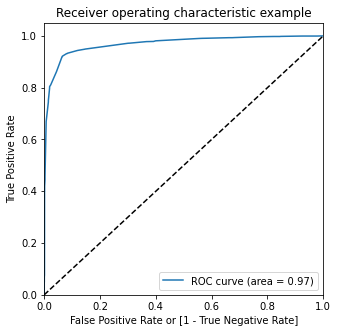

In [124]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

The ROC Curve should be a value close to 1. We are getting a good value of 0.97 indicating a good predictive model.

#### Finding Optimal Cutoff Point

In [125]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.074746,9196,0,1,0,0,0,0,0,0,0,0,0
1,0,0.074746,4696,0,1,0,0,0,0,0,0,0,0,0
2,0,0.512549,3274,1,1,1,1,1,1,1,0,0,0,0
3,0,0.010290,2164,0,1,0,0,0,0,0,0,0,0,0
4,1,0.966902,1667,1,1,1,1,1,1,1,1,1,1,1


In [126]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380565  1.000000  0.000000
0.1   0.1  0.805808  0.971069  0.704276
0.2   0.2  0.923408  0.931656  0.918341
0.3   0.3  0.929791  0.918239  0.936888
0.4   0.4  0.929791  0.918239  0.936888
0.5   0.5  0.929472  0.917400  0.936888
0.6   0.6  0.913515  0.810482  0.976816
0.7   0.7  0.913515  0.804612  0.980422
0.8   0.8  0.913356  0.804193  0.980422
0.9   0.9  0.893729  0.745073  0.985059


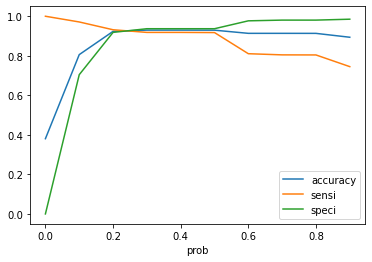

In [127]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the graph it is visible that the optimal cut off is at 0.4 .

In [128]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.074746,9196,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.074746,4696,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.512549,3274,1,1,1,1,1,1,1,0,0,0,0,1
3,0,0.010290,2164,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.966902,1667,1,1,1,1,1,1,1,1,1,1,1,1


In [129]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.074746,9196,0,7
1,0,0.074746,4696,0,7
2,0,0.512549,3274,1,51
3,0,0.010290,2164,0,1
4,1,0.966902,1667,1,97


In [130]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9297909685655018

In [131]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3637,  245],
       [ 195, 2190]], dtype=int64)

In [132]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [133]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9182389937106918

In [134]:
# Let us calculate specificity
TN / float(TN+FP)

0.9368882019577537

#### Observation:
So as we can see above the model seems to be performing well. The ROC curve has a value of 0.97, which is very good. We have the following values for the Train Data:

Accuracy : 92.9%

Sensitivity : 91.8%

Specificity : 93.6%

Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall.

In [135]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.06311179804224626


In [136]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8993839835728953


In [137]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9491127348643006


In [138]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3637,  245],
       [ 195, 2190]], dtype=int64)

In [139]:
# Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8993839835728953

In [140]:
# Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9182389937106918

In [141]:
from sklearn.metrics import precision_score, recall_score

In [142]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.8993839835728953

In [143]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9182389937106918

In [145]:
from sklearn.metrics import precision_recall_curve

In [146]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

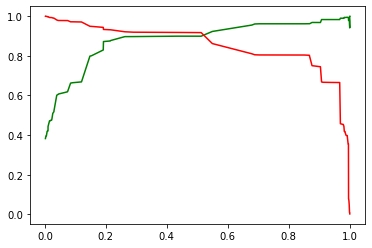

In [147]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [148]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,What is your current occupation_housewife,What is your current occupation_not provided,What is your current occupation_other,What is your current occupation_student,...,Last Notable Activity_sms sent,Tags_Other_Tags,Tags_busy,Tags_closed by horizzon,Tags_graduation in progress,Tags_interested in other courses,Tags_lost to eins,Tags_lost to others,Tags_ringing,Tags_will revert after reading the email
7681,0.575687,-0.311318,0.092860,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
984,-0.090676,-0.550262,0.356568,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8135,-0.423857,0.812462,-0.170849,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
6915,0.242505,-0.628665,-0.170849,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2712,-0.090676,-0.421456,0.356568,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [149]:
X_test = X_test[col]
X_test.head()

,What is your current occupation_not provided,Lead Source_welingak website,Last Activity_email bounced,Last Activity_sms sent,Last Notable Activity_email link clicked,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Tags_Other_Tags,Tags_closed by horizzon,Tags_graduation in progress,Tags_interested in other courses,Tags_lost to eins,Tags_ringing,Tags_will revert after reading the email
7681,0,0,0,1,0,0,0,0,0,0,0,0,1,0
984,0,0,0,1,0,1,0,1,0,0,0,0,0,0
8135,1,0,0,1,0,0,0,0,0,0,0,0,0,0
6915,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2712,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [150]:
X_test_sm = sm.add_constant(X_test)

####  Predictions on Test Set

In [151]:
y_test_pred = res.predict(X_test_sm)

In [152]:
y_test_pred[:10]

7681    0.074746
984     0.038924
8135    0.512549
6915    0.010377
2712    0.966902
244     0.002356
4698    0.022811
8287    0.029818
6791    0.966902
8970    0.010290
dtype: float64

In [153]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [154]:
# Let's see the head
y_pred_1.head()

,0
7681,0.074746
984,0.038924
8135,0.512549
6915,0.010377
2712,0.966902


In [155]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [156]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [157]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [158]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [159]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7681,0.074746
1,0,984,0.038924
2,0,8135,0.512549
3,0,6915,0.010377
4,1,2712,0.966902


In [160]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [161]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,7681,0.074746
1,0,984,0.038924
2,0,8135,0.512549
3,0,6915,0.010377
4,1,2712,0.966902


In [162]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [163]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,7681,0,0.074746,7
1,984,0,0.038924,4
2,8135,0,0.512549,51
3,6915,0,0.010377,1
4,2712,1,0.966902,97


In [164]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.4 else 0)

In [165]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,7681,0,0.074746,7,0
1,984,0,0.038924,4,0
2,8135,0,0.512549,51,1
3,6915,0,0.010377,1,0
4,2712,1,0.966902,97,1


In [166]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9415487714072971

In [167]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1586,   90],
       [  67,  943]], dtype=int64)

In [168]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [169]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9336633663366337

In [170]:
# Let us calculate specificity
TN / float(TN+FP)

0.9463007159904535

In [171]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.9128751210067764

In [172]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9336633663366337

##### Observation:
After running the model on the Test Data these are the figures we obtain:

Accuracy : 94.1%

Sensitivity : 93.3%

Specificity : 94.6%

#### Conclusion
It was found that the variables that mattered the most in the potential buyers are (In descending order) :

1.The total time spend on the Website.

2.Total number of visits.

3.When the lead source was:
a. Google

b. Direct traffic

c. Organic search

d. Welingak website
4. When the last activity was:

a. SMS

b. Olark chat conversation

5. When the lead origin is Lead add format. 
6. When their current occupation is as a working professional.
Keeping these in mind the X Education can flourish as they have a very high chance to get almost all the potential buyers to change their mind and buy their courses.

#### Final Observation:
Let us compare the values obtained for Train & Test:

Train Data: 

Accuracy : 92.9%

Sensitivity : 91.8%

Specificity :  93.6%

Test Data: 

Accuracy : 94.1%

Sensitivity : 93.3%

Specificity : 94.6%

The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model.